<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/02Classificazione/03AlberiDecisionali_ForesteCasuali/alberiDecisionali01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alberi Decisionali
## Esercizio 1
**Author: Cristiano Casadei**

In [1]:
!wget "https://raw.githubusercontent.com/mikeizbicki/datasets/master/csv/uci/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv" -O liver.csv

--2022-12-19 13:42:27--  https://raw.githubusercontent.com/mikeizbicki/datasets/master/csv/uci/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23755 (23K) [text/plain]
Saving to: ‘liver.csv’

liver.csv           100%[===================>]  23.20K  --.-KB/s    in 0.004s  

2022-12-19 13:42:27 (5.71 MB/s) - ‘liver.csv’ saved [23755/23755]



In [2]:
import graphviz as graphviz
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
# carico il dataset
indianLiver = pd.read_csv("./liver.csv", names=["AGE", "GENDER", "TB", "DB", "ALK", "SGPT", "SGOT", "TP", "ALB", "AG", "LABEL"])
print("Diamo uno sguardo alla struttura dati")
indianLiver.info()

Diamo uno sguardo alla struttura dati
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     583 non-null    int64  
 1   GENDER  583 non-null    object 
 2   TB      583 non-null    float64
 3   DB      583 non-null    float64
 4   ALK     583 non-null    int64  
 5   SGPT    583 non-null    int64  
 6   SGOT    583 non-null    int64  
 7   TP      583 non-null    float64
 8   ALB     583 non-null    float64
 9   AG      579 non-null    float64
 10  LABEL   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
print("Diamo uno sguardo ai dati")
indianLiver.head()

Diamo uno sguardo ai dati


,AGE,GENDER,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG,LABEL
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# codifico le colonne non numeriche con delle colonne booleane dummy
# in questo caso la colonna "gender" verrà sostituita da due colonne
# "gender_female" e "gender_male" che indicheranno l'appartenenza al genere
indianLiver = pd.get_dummies(indianLiver)
print("Il dataset modificato con le colonne dummies del sesso")
indianLiver.head()

Il dataset modificato con le colonne dummies del sesso


,AGE,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG,LABEL,GENDER_Female,GENDER_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [6]:
# creo i dataset delle proprietà X e del target Y
X = indianLiver.drop("LABEL", axis=1).values
Y = indianLiver["LABEL"].values

# elimino le righe dove compare un NaN nei valori (darebbe errore in fase di elaborazione)
Y = Y[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]

# suddivido il dataset in dataset di train e di test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# NOTA: gli alberi decisionali non richiedono normalizzazione o standardizzazione!

In [7]:
# istanzio la classe di creazione di alberi decisionali, utilizzando l'algoritmo Gini per calcolare l'impurità
decTree = DecisionTreeClassifier(criterion="gini")
decTree.fit(X_train, Y_train)

# calcolo le predizioni su train set e test set
Y_pred_train = decTree.predict(X_train)
Y_pred_test = decTree.predict(X_test)

# calcolo l'accuracy
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print("Uso l'algoritmo 'gini' per l'impurità")
print("Profondità albero:", decTree.tree_.max_depth)
print("Accuracy train set:", accuracy_train)
print("Accuracy test set:", accuracy_test)

Uso l'algoritmo 'gini' per l'impurità
Profondità albero: 20
Accuracy train set: 1.0
Accuracy test set: 0.6206896551724138


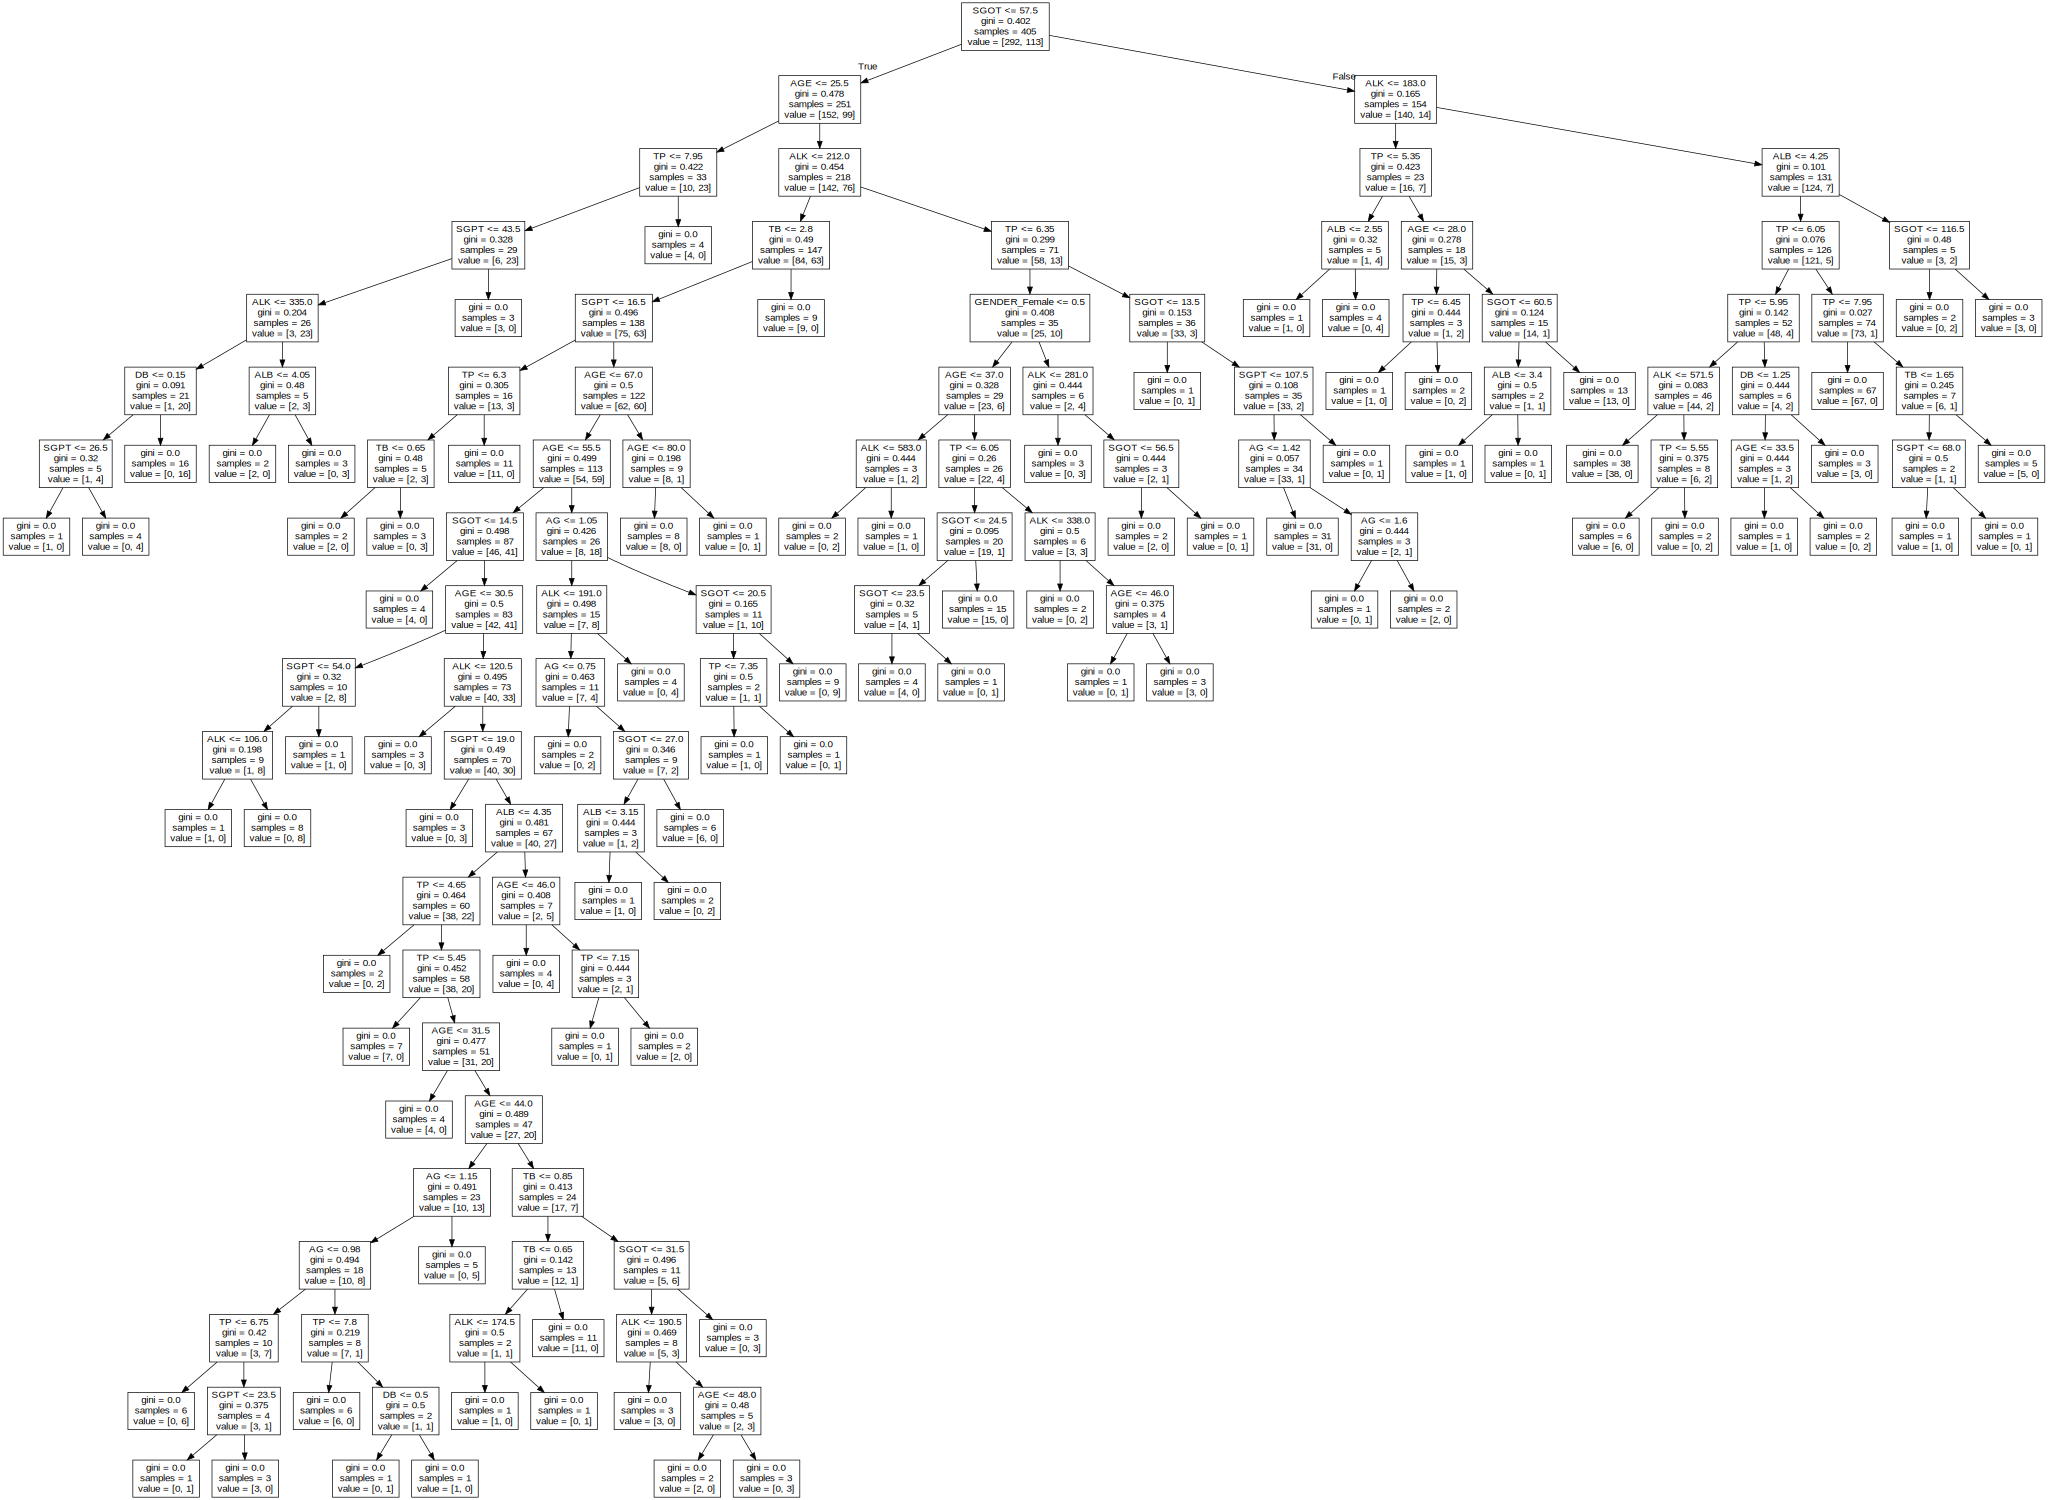

In [8]:
# metto in grafica l'albero decisionale e creo un pdf
dot_data = export_graphviz(decTree, out_file=None,
                           feature_names=indianLiver.columns.drop("LABEL"))
graph = graphviz.Source(dot_data)
graph

In [9]:
# rifaccio usando l'entropia
decTree = DecisionTreeClassifier(criterion="entropy")
decTree.fit(X_train, Y_train)

# calcolo le predizioni su train set e test set
Y_pred_train = decTree.predict(X_train)
Y_pred_test = decTree.predict(X_test)

# calcolo l'accuracy
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print("Uso l'algoritmo 'entropy' per l'impurità")
print("Profondità albero:", decTree.tree_.max_depth)
print("Accuracy train set:", accuracy_train)
print("Accuracy test set:", accuracy_test)

Uso l'algoritmo 'entropy' per l'impurità
Profondità albero: 21
Accuracy train set: 1.0
Accuracy test set: 0.5919540229885057


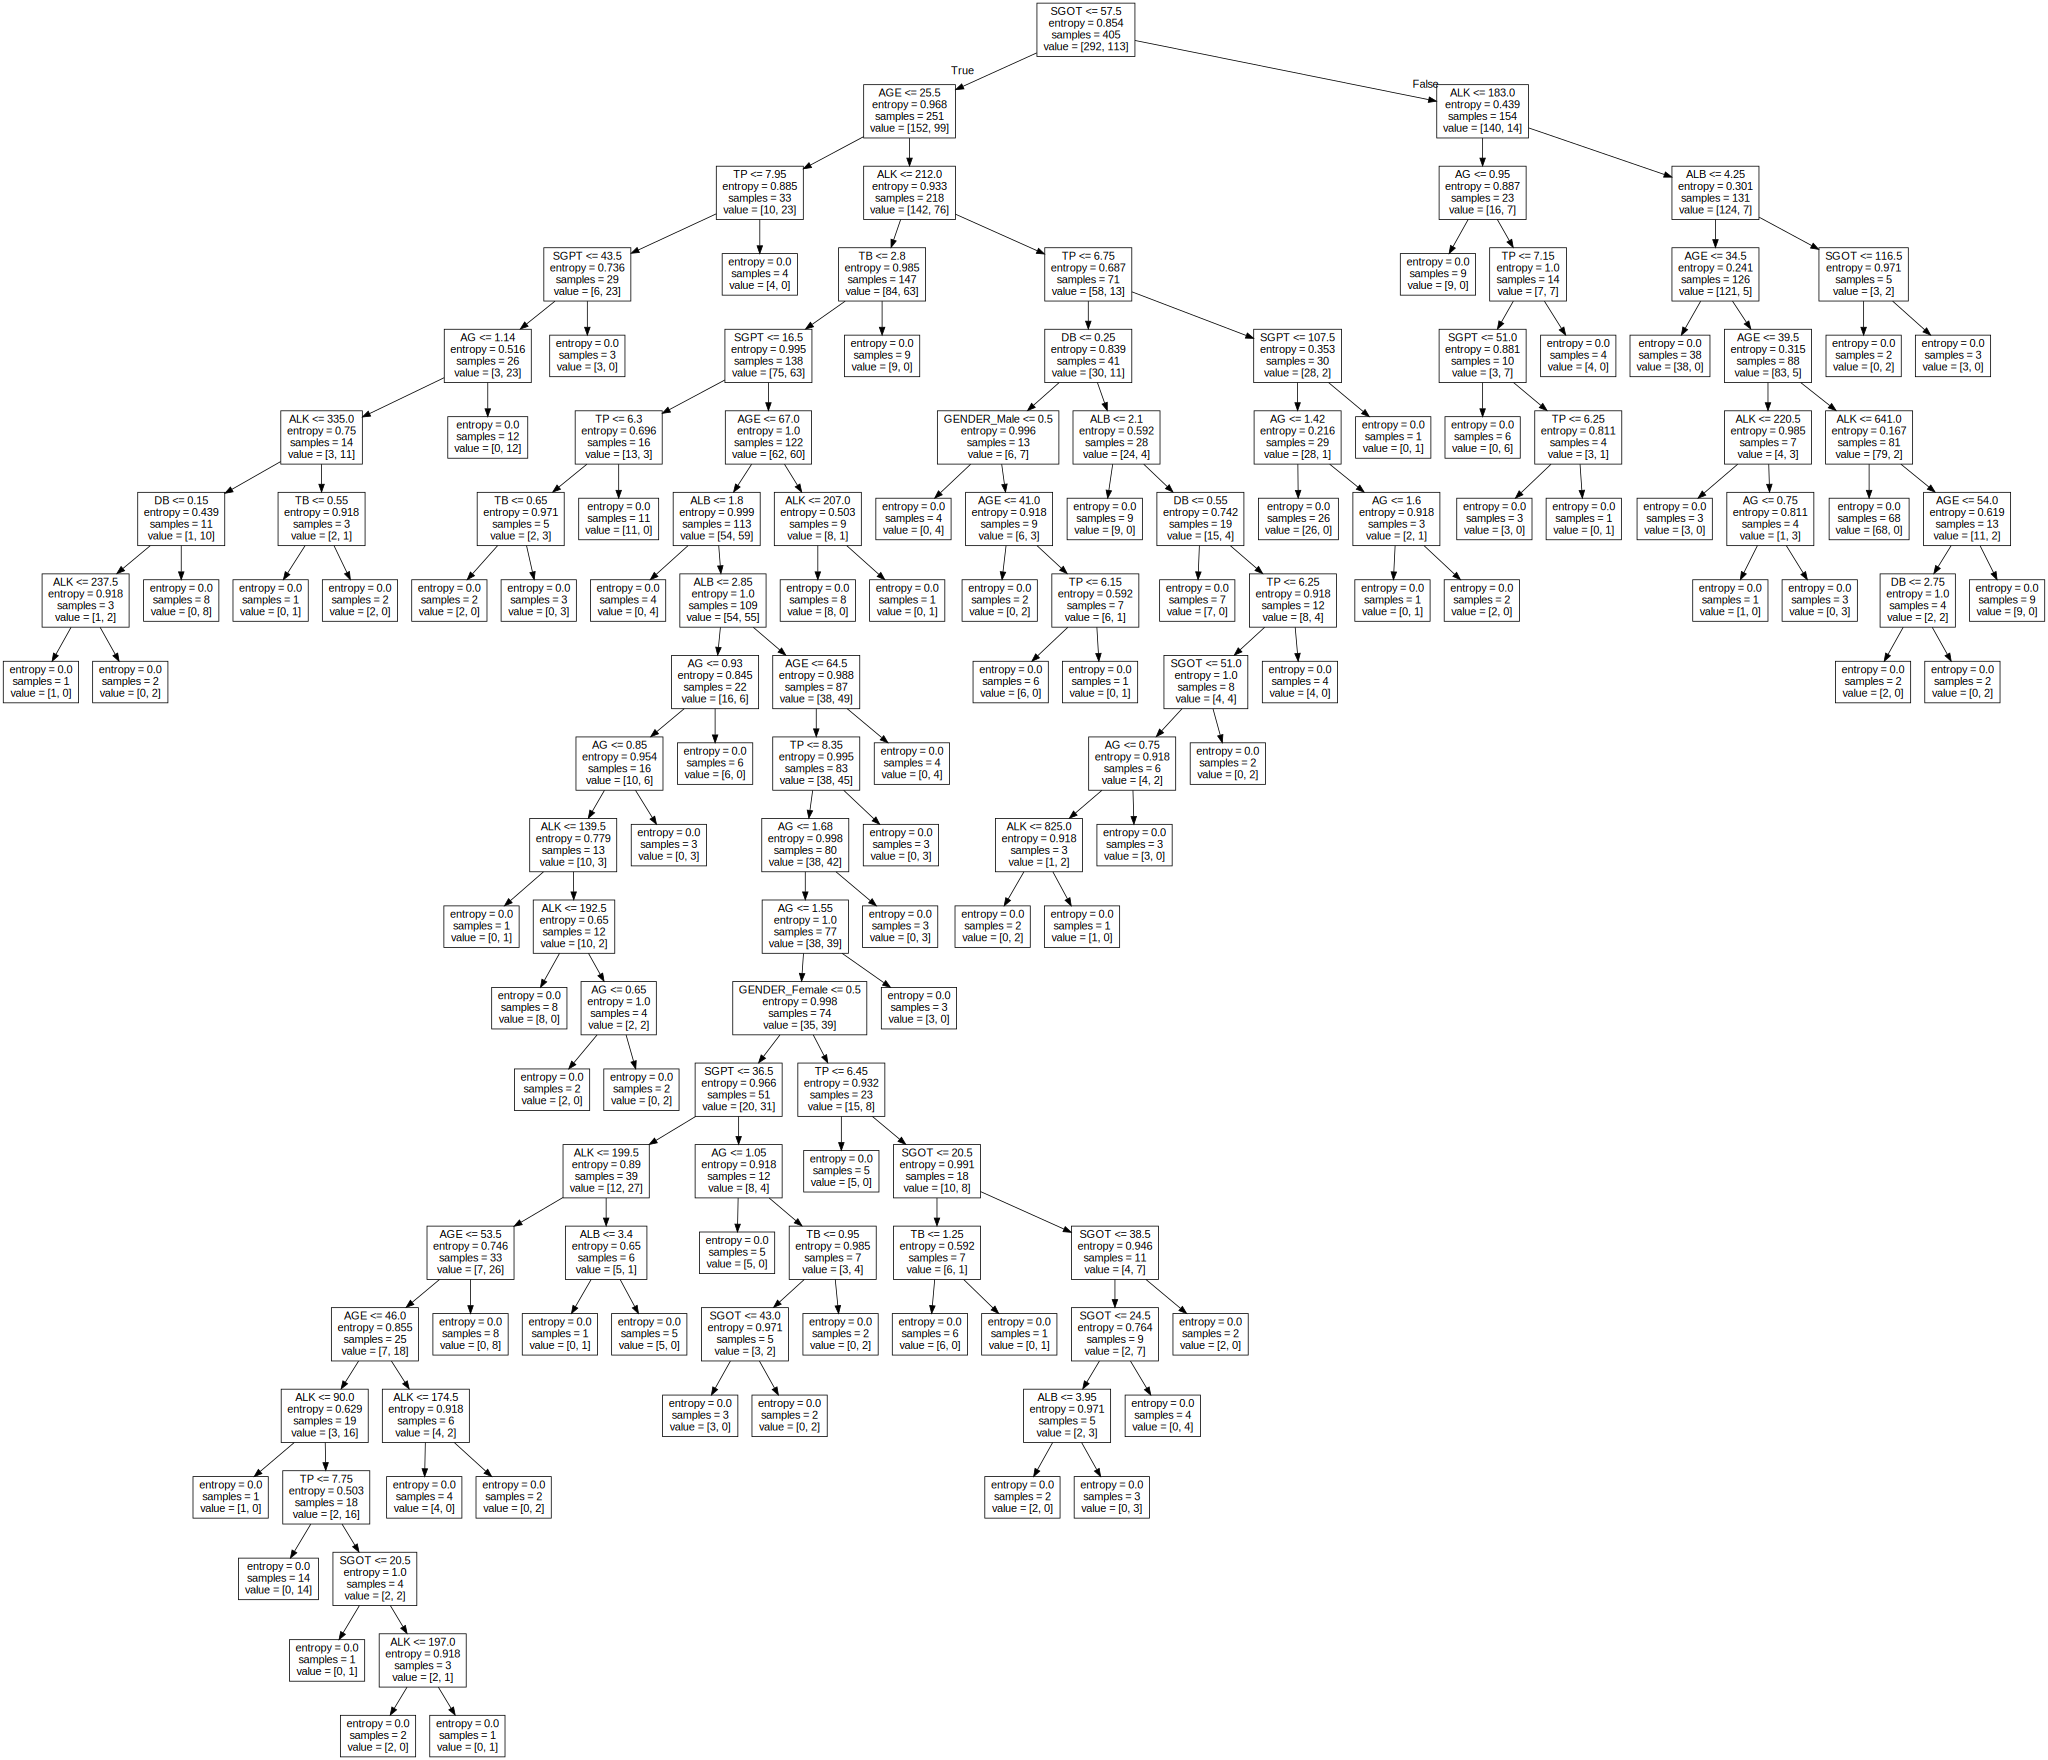

In [10]:
# metto in grafica l'albero decisionale e creo un pdf
dot_data = export_graphviz(decTree, out_file=None,
                           feature_names=indianLiver.columns.drop("LABEL"))
graph = graphviz.Source(dot_data)
graph

In [11]:
# rifaccio usando nuovamente Gini, ma limitando la profondità dell'albero
decTree = DecisionTreeClassifier(criterion="gini", max_depth=2)
decTree.fit(X_train, Y_train)

# calcolo le predizioni su train set e test set
Y_pred_train = decTree.predict(X_train)
Y_pred_test = decTree.predict(X_test)

# calcolo l'accuracy
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print("Uso l'algoritmo 'gini' per l'impurità e limito a 2 la profondità dell'albero")
print("Profondità albero:", decTree.tree_.max_depth)
print("Accuracy train set:", accuracy_train)
print("Accuracy test set:", accuracy_test)

Uso l'algoritmo 'gini' per l'impurità e limito a 2 la profondità dell'albero
Profondità albero: 2
Accuracy train set: 0.7530864197530864
Accuracy test set: 0.7011494252873564


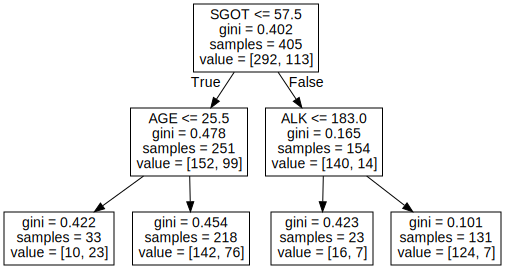

In [12]:
# metto in grafica l'albero decisionale e creo un pdf
dot_data = export_graphviz(decTree, out_file=None,
                           feature_names=indianLiver.columns.drop("LABEL"))
graph = graphviz.Source(dot_data)
graph